IMPORT LIBRARIES

In [16]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import sys

File Naming

In [17]:
def file_name(f):
    return f.split('.')[0],f.split('.')[0]+'.xlsx',f.split('.')[0]+'.png'

spr_file = "2358_1051938D.SPR"
excel_dir, excel_report,graph_image = file_name(spr_file)

File Reading

In [18]:
file =open(spr_file, "r")
lines = file.readlines()
file.close()

Data Frame Formatting

In [19]:
def date_format(data):
    data_1 = re.findall('\d+', data[0])
    first_val = data_1[0] + '/' + data_1[1] + '/' + data_1[2]
    second_val = data_1[3] + ':' + data_1[4] + ':' + data_1[5]
    return (first_val, second_val)

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11',
                             'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20', 'Col21',
                             'Col22', 'Col23', 'Col24', 'Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30', 'Col31',
                             'Col32', 'Col33', 'Col34', 'Col35', 'Col36', 'Col37', 'Col38', 'Col39', 'Col40', 'Col41',
                             'Col42', 'Col43', 'Col44', 'Col45', 'Col46', 'Col47', 'Col48', 'Col49', 'Col50', 'Col51', 'Col52'])


df = df.append({'Col1':'Date', 'Col2': "Time",'Col3':'Shot Number','Col4':'StartUp On','Col5':'Cycl Time (s)',
                    'Col6':'DLck HlpU (%)','Col7':'Low Spd (m/s)','Col8':'High Spd (m/s)','Col9':'Pres Up T (m/s)',
                    'Col10':'Cast Pres (MPa)','Col11':'Bis Size (mm)','Col12':'H-Spd St (mm)','Col13':'H-Length (mm)',
                    'Col14':'Fill End (mm)','Col15':'Peek Spd (m/s)','Col16':'Shot Wt (kg)','Col17':'Spray (sec)',
                    'Col18':'Core In (sec)','Col19':'DieC lose (sec)','Col20':'Pouring (sec)','Col21':'Fill Pres (MPa)',
                    'Col22':'Fill Time (ms)','Col23':'Shot (sec)','Col23':'Work Cool (sec)','Col24':'Die Open (sec)',
                    'Col25':'D-Height (mm)','Col26':'Pour Ret (deg)','Col27':'A M.Temp 1 Max (ßC)',
                    'Col28':'A M.Temp 1 Min (ßC)','Col29':'B M.Temp 2 Max (ßC)','Col30':'B M.Temp 2 Min (ßC)',
                    'Col31':'Inten Tms','Col32':'C F.Temp 1 Max (ßC)','Col33':'C F.Temp 1 Min (ßC)','Col34':'Fill Stat (mm)',
                    'Col35':'P Up Stat (mm)','Col36':'Core Out (sec)','Col37':'Eject (sec)','Col38':'Take-Out (sec)',
                    'Col39':'D F.Temp 2 Max (ßC)','Col40':'Shtpres (MPa)','Col41':'D F.Temp 2 Min (ßC)',
                    'Col42':'E Metal Ave (ßC)','Col43':'F M.Cool. Ave(ßC)','Col44':'M.Cooling Water (l/m)',
                    'Col45':'F.Cooling Water (l/m)','Col46':'Tip Cooling Flow (l/m)','Col47':'Oil Cooler Flow (l/m)',
                    'Col48':'VShutPos (mm)','Col49':'DieLub.SprayLe (ml)','Col50':'Vacuum (kPa)',
                    'Col51':'Peak Vacum (kPa)','Col52':" "},ignore_index=True)


In [20]:
for line in lines:
    words = line.split(',')
    #print(words[0])
    numbers_col1 = re.findall('\d+',words[0])
    if len(numbers_col1) >= 6:
        #print(words)
        #print(len(words))
        first_columns = date_format(words)
        df = df.append({'Col1':first_columns[0], 'Col2': first_columns[1],'Col3':words[1],'Col4':words[2],'Col5':float(str(words[3])),
                            'Col6':int(words[4]),'Col7':float(words[5]),'Col8':float(words[6]),'Col9':int(words[7]),'Col10':float(words[8]),'Col11':float(words[9]),
                            'Col12':float(words[10]),'Col13':float(words[11]),'Col14':float(words[12]),'Col15':float(words[13]),'Col16':float(words[14]),
                            'Col17':float(words[15]),'Col18':float(words[16]),'Col19':float(words[17]),'Col20':float(words[18]),'Col21':float(words[19]),
                            'Col22':int(words[20]),'Col23':float(words[21]),'Col23':float(words[22]),'Col24':float(words[23]),'Col25':float(words[24]),
                            'Col26':float(words[25]),'Col27':float(words[26]),'Col28':float(words[27]),'Col29':float(words[28]),'Col30':float(words[29]),
                            'Col31':float(words[30]),'Col32':float(words[31]),'Col33':float(words[32]),'Col34':float(words[33]),'Col35':float(words[34]),
                            'Col36':float(words[35]),'Col37':float(words[36]),'Col38':float(words[37]),'Col39':float(words[38]),'Col40':float(words[39]),
                            'Col41':float(words[40]),'Col42':float(words[41]),'Col43':float(words[42]),'Col44':float(words[43]),'Col45':float(words[44]),
                            'Col46':float(words[45]),'Col47':float(words[46]),'Col48':float(words[47]),'Col49':float(words[48]),'Col50':float(words[49]),
                            'Col51':float(words[50]),'Col52':" "},ignore_index=True)

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header

APPLY CONTROL PARAMETERS

In [21]:
#Cycle Time
df.loc[(df['Cycl Time (s)']>=24) & (df['Cycl Time (s)']<=35),'Cycle_Time_Value'] = 'Cycle_Time_True'
df.loc[(df['Cycl Time (s)'] < 24) | (df['Cycl Time (s)'] > 35),'Cycle_Time_Value'] = 'Cycle_Time_False'

#Slow Speed
df.loc[(df['Low Spd (m/s)']>=0.290) & (df['Low Spd (m/s)']<=0.310),'L Spd Value'] = 'L_Spd_True'
df.loc[(df['Low Spd (m/s)'] < 0.290) | (df['Low Spd (m/s)'] > 0.310),'L Spd Value'] = 'L_Spd_False'

#High Speed
df.loc[(df['High Spd (m/s)']>=2.5) & (df['High Spd (m/s)']<=3.5),'H Spd Value'] = 'H_Spd_True'
df.loc[(df['High Spd (m/s)'] < 2.5) | (df['High Spd (m/s)'] > 3.5),'H Spd Value'] = 'H_Spd_False'

#High Speed Length
df.loc[(df['H-Length (mm)']>=70) & (df['H-Length (mm)']<=80),'H_Length_State'] = 'H_Length_True'
df.loc[(df['H-Length (mm)'] < 70) | (df['H-Length (mm)'] > 80),'H_Length_State'] = 'H_Length_False'

#Fill Time
df.loc[(df['Fill Time (ms)']>=20) & (df['Fill Time (ms)']<=30),'Fill_Time_State'] = 'Fill_Time_True'
df.loc[(df['Fill Time (ms)'] < 20) | (df['Fill Time (ms)'] > 30),'Fill_Time_State'] = 'Fill_Time_False'

#Casting Pressure
df.loc[(df['Cast Pres (MPa)']>=100) & (df['Cast Pres (MPa)']<=110),'Cast_Pres_State'] = 'Cast_Pres_True'
df.loc[(df['Cast Pres (MPa)'] < 100) | (df['Cast Pres (MPa)'] > 110),'Cast_Pres_State'] = 'Cast_Pres_False'

#Biscuit Thickness
df.loc[(df['Bis Size (mm)']>=10) & (df['Bis Size (mm)']<=16),'Biz_Size_State'] = 'Biz_Size_True'
df.loc[(df['Bis Size (mm)'] < 10) | (df['Bis Size (mm)'] > 16),'Biz_Size_State'] = 'Biz_Size_False'

#Mold Temp, Fixed1, Min
df.loc[(df['A M.Temp 1 Min (ßC)']>=100) & (df['A M.Temp 1 Min (ßC)']<=140),'Temp_A_Min_State'] = 'Temp_A_Min_True'
df.loc[(df['A M.Temp 1 Min (ßC)'] < 100) | (df['A M.Temp 1 Min (ßC)'] > 140),'Temp_A_Min_State'] = 'Temp_A_Min_False'

#Mold Temp, Fixed2, Min
df.loc[(df['B M.Temp 2 Min (ßC)']>=100) & (df['B M.Temp 2 Min (ßC)']<=140),'Temp_B_Min_State'] = 'Temp_B_Min_True'
df.loc[(df['B M.Temp 2 Min (ßC)'] < 100) | (df['B M.Temp 2 Min (ßC)'] > 140),'Temp_B_Min_State'] = 'Temp_B_Min_False'

#Mold Temp, Moving1, Min
df.loc[(df['C F.Temp 1 Min (ßC)']>=100) & (df['C F.Temp 1 Min (ßC)']<=140),'Temp_C_Min_State'] = 'Temp_C_Min_True'
df.loc[(df['C F.Temp 1 Min (ßC)'] < 100) | (df['C F.Temp 1 Min (ßC)'] > 140),'Temp_C_Min_State'] = 'Temp_C_Min_False'

#Mold Temp, Moving2, Min
df.loc[(df['D F.Temp 2 Min (ßC)']>=100) & (df['D F.Temp 2 Min (ßC)']<=140),'Temp_D_Min_State'] = 'Temp_D_Min_True'
df.loc[(df['D F.Temp 2 Min (ßC)'] < 100) | (df['D F.Temp 2 Min (ßC)'] > 140),'Temp_D_Min_State'] = 'Temp_D_Min_False'

#All Temp
df.loc[(df['E Metal Ave (ßC)']>=659) & (df['E Metal Ave (ßC)']<=681),'AL_Temp_State'] = 'AL_Temp_True'
df.loc[(df['E Metal Ave (ßC)'] < 659) | (df['E Metal Ave (ßC)'] > 681),'AL_Temp_State'] = 'AL_Temp_False'


SEGRAGATE THE DATA

In [22]:
#Pass Part
df.loc[(df['Cycle_Time_Value']=='Cycle_Time_True') & (df['L Spd Value']=='L_Spd_True') 
       & (df['H Spd Value']=='H_Spd_True') & (df['H_Length_State']=='H_Length_True') 
       & (df['Fill_Time_State']=='Fill_Time_True') 
       & (df['Cast_Pres_State']=='Cast_Pres_True') 
       & (df['Biz_Size_State']=='Biz_Size_True')
       & (df['Temp_A_Min_State']=='Temp_A_Min_True')
       & (df['Temp_B_Min_State']=='Temp_B_Min_True')
       & (df['Temp_C_Min_State']=='Temp_C_Min_True')
       & (df['Temp_D_Min_State']=='Temp_D_Min_True')
       & (df['AL_Temp_State']=='AL_Temp_True'),'Pass_Status'] = 1

#Failed Part
df.loc[(df['Cycle_Time_Value']=='Cycle_Time_False') | (df['L Spd Value']=='L_Spd_False') 
       | (df['H Spd Value']=='H_Spd_False') | (df['H_Length_State']=='H_Length_False') 
       | (df['Fill_Time_State']=='Fill_Time_False') 
       | (df['Cast_Pres_State']=='Cast_Pres_False') 
       | (df['Biz_Size_State']=='Biz_Size_False')
       | (df['Temp_A_Min_State']=='Temp_A_Min_False')
       | (df['Temp_B_Min_State']=='Temp_B_Min_False')
       | (df['Temp_C_Min_State']=='Temp_C_Min_False')
       | (df['Temp_D_Min_State']=='Temp_D_Min_False')
       | (df['AL_Temp_State']=='AL_Temp_False'),'Pass_Status'] = 0

#Splitting
seg = df.groupby(['Pass_Status'])

pass_part = 0
fail_part = 0
fail_count = 0
pass_count = 0


if 0 in seg.groups:
    fail_part = seg.get_group(0)
    fail_count = fail_part.shape[0]
    
else:
    fail_part = pd.DataFrame()
    fail_count = 0
    
    
if 1 in seg.groups:
    pass_part = seg.get_group(1)
    pass_count = pass_part.shape[0]
else:
    pass_part = pd.DataFrame()
    pass_count = 0
    

#Current Data
date_file = df['Date']



In [23]:
seg.groups

{0.0: Int64Index([20, 32, 50], dtype='int64'),
 1.0: Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36,
             37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64')}

In [24]:
pass_part

,Date,Time,Shot Number,StartUp On,Cycl Time (s),DLck HlpU (%),Low Spd (m/s),High Spd (m/s),Pres Up T (m/s),Cast Pres (MPa),...,H_Length_State,Fill_Time_State,Cast_Pres_State,Biz_Size_State,Temp_A_Min_State,Temp_B_Min_State,Temp_C_Min_State,Temp_D_Min_State,AL_Temp_State,Pass_Status
1,08/10/20,23:58:26,1051938,""" """,28.7,102,0.3,2.938,40,102,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
2,08/10/20,23:58:56,1051939,""" """,28.8,102,0.3,2.938,43,102.1,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
3,08/10/20,23:59:24,1051940,""" """,28.6,102,0.301,2.938,41,102,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
4,08/10/20,23:59:54,1051941,""" """,28.7,102,0.3,2.938,41,102.1,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
5,08/11/20,00:00:22,1051942,""" """,28.8,101,0.301,2.942,36,102,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
6,08/11/20,00:00:52,1051943,""" """,28.9,102,0.3,2.923,36,102.1,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
7,08/11/20,00:01:18,1051944,""" """,28.3,101,0.3,2.932,36,102.1,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
8,08/11/20,00:01:48,1051945,""" """,29.6,102,0.301,2.938,36,102,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
9,08/11/20,00:02:18,1051946,""" """,29.3,102,0.301,2.938,35,102.1,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0
10,08/11/20,00:02:46,1051947,""" """,29.3,102,0.301,2.938,40,102,...,H_Length_True,Fill_Time_True,Cast_Pres_True,Biz_Size_True,Temp_A_Min_True,Temp_B_Min_True,Temp_C_Min_True,Temp_D_Min_True,AL_Temp_True,1.0


CAUSES OF FAILURE

In [25]:
#LOW SPEED FAILURE
fail_lspd = fail_part.groupby(['L Spd Value'])
fail_lspd = fail_lspd.groups

if 'L_Spd_False' in fail_lspd.keys():
    fail_lspd = fail_part.groupby(['L Spd Value']).get_group('L_Spd_False').shape[0]
    
else:
    fail_lspd = 0
    
#HIGH SPEED FAILURE
fail_hspd = fail_part.groupby(['H Spd Value'])
fail_hspd = fail_hspd.groups

if 'H_Spd_False' in fail_hspd.keys():
    fail_hspd = fail_part.groupby(['H Spd Value']).get_group('H_Spd_False').shape[0]
else:
    fail_hspd = 0
    
#H-LENGTH FAILURE
fail_h_length = fail_part.groupby(['H_Length_State'])
fail_h_length = fail_h_length.groups

if 'H_Length_False' in fail_h_length.keys():
    fail_h_length = fail_part.groupby(['H_Length_State']).get_group('H_Length_False').shape[0]
else:
    fail_h_length = 0
    
#FILL TIME FAILURE
fail_fill_time = fail_part.groupby(['Fill_Time_State'])
fail_fill_time = fail_fill_time.groups

if 'Fill_Time_False' in fail_fill_time.keys():
    fail_fill_time = fail_part.groupby(['Fill_Time_State']).get_group('Fill_Time_False').shape[0]
else:
    fail_fill_time = 0
    
#CAST PRESSURE FAILURE
fail_cast_group = fail_part.groupby(['Cast_Pres_State'])
fail_cast_pres = fail_cast_group.groups

if 'Cast_Pres_False' in fail_cast_pres.keys():
    fail_cast_pres = fail_cast_group.get_group('Cast_Pres_False').shape[0] 
else:
    fail_cast_pres = 0
    
#BIZ SIZE FAILURE
fail_biz_group = fail_part.groupby(['Biz_Size_State'])
fail_biz = fail_biz_group.groups

if 'Biz_Size_False' in fail_biz.keys():
    fail_biz = fail_biz_group.get_group('Biz_Size_False').shape[0]
else:
    fail_biz = 0
    
#TEMP A FAILURE
fail_tempa_group = fail_part.groupby(['Temp_A_Min_State'])
fail_tempa = fail_tempa_group.groups

if 'Temp_A_Min_False' in fail_tempa.keys():
    fail_tempa = fail_tempa_group.get_group('Temp_A_Min_False').shape[0]
else:
    fail_tempa = 0
    
#TEMP B FAILURE
fail_tempb_group = fail_part.groupby(['Temp_B_Min_State'])
fail_tempb = fail_tempb_group.groups

if 'Temp_B_Min_False' in fail_tempb.keys():
    fail_tempb = fail_tempb_group.get_group('Temp_B_Min_False').shape[0]
else:
    fail_tempb = 0
    
#TEMP C FAILURE
fail_tempc_group = fail_part.groupby(['Temp_C_Min_State'])
fail_tempc = fail_tempc_group.groups

if 'Temp_C_Min_False' in fail_tempc.keys():
    fail_tempc = fail_tempc_group.get_group('Temp_C_Min_False').shape[0]
else:
    fail_tempc = 0
    
#TEMP D FAILURE
fail_tempd_group = fail_part.groupby(['Temp_D_Min_State'])
fail_tempd = fail_tempd_group.groups

if 'Temp_D_Min_False' in fail_tempd.keys():
    fail_tempd = fail_tempd_group.get_group('Temp_D_Min_False').shape[0]
else:
    fail_tempd = 0
    
#AL TEMP FAILURE
fail_altemp_group = fail_part.groupby(['AL_Temp_State'])
fail_altemp = fail_altemp_group.groups

if 'AL_Temp_False' in fail_altemp.keys():
    fail_altemp = fail_altemp_group.get_group('AL_Temp_False').shape[0]
else:
    fail_altemp = 0

WRITING TO EXCEL

In [26]:
if os.path.isdir(excel_dir) == False:
    os.mkdir(excel_dir)
else:
    pass
writer = pd.ExcelWriter(excel_dir + '/' + excel_report, engine='xlsxwriter')
df.to_excel(writer,sheet_name="All_Data", startcol=0, index=False)
pass_part.to_excel(writer,sheet_name="Pass_Data",startcol=0,index=False)
fail_part.to_excel(writer,sheet_name="Fail_Data",startcol=0,index=False)

In [27]:
writer.save()

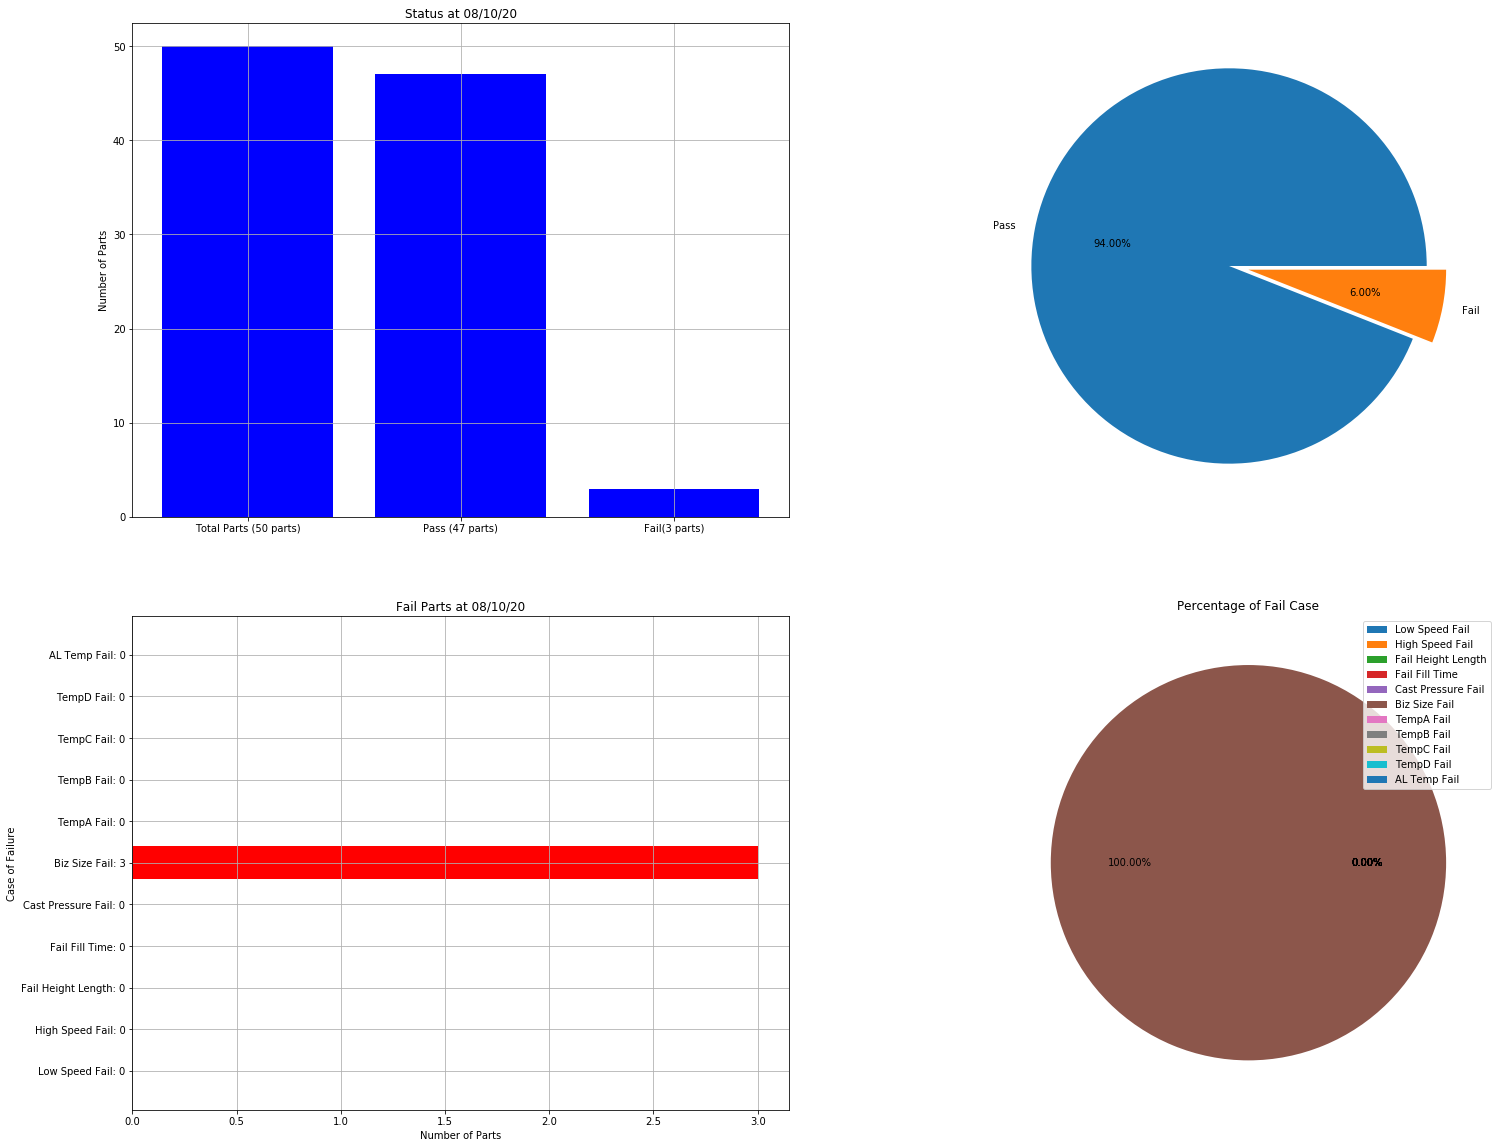

In [28]:
fig = plt.figure(figsize=(40,20))
axis1 = fig.add_subplot(2,3,1)

status = ['Total Parts '+ "("+ str(df.shape[0])+ " parts"+ ")",'Pass '+ "("+ str(pass_count)+ " parts"+ ")",
          'Fail'+ "("+ str(fail_count)+ " parts"+ ")"]
part_numbers = [df.shape[0],pass_count,fail_count]
part_status = ['Pass', 'Fail']

#for pie chart
explode = (0.1,0)
axis1.bar(status,part_numbers, color = 'b')
axis1.grid(True)
plt.title('Status at ' + date_file[1])
plt.ylabel("Number of Parts")

axis2 = fig.add_subplot(2,3,2)

axis2.pie([pass_count,fail_count], explode=explode, labels=part_status,autopct='%1.2f%%')

fail_cases = ['Low Speed Fail: '+str(fail_lspd),'High Speed Fail: ' + str(fail_hspd),'Fail Height Length: '+str(fail_h_length),
             'Fail Fill Time: '+str(fail_fill_time),'Cast Pressure Fail: '+ str(fail_cast_pres),
             'Biz Size Fail: '+ str(fail_biz), 'TempA Fail: '+str(fail_tempa),
              'TempB Fail: '+str(fail_tempb),
              'TempC Fail: '+str(fail_tempc),'TempD Fail: '+str(fail_tempd),'AL Temp Fail: '+str(fail_altemp)]

fail_status = [fail_lspd, fail_hspd, fail_h_length, fail_fill_time,fail_cast_pres,fail_biz,
               fail_tempa,fail_tempb,fail_tempc,fail_tempd,fail_altemp]
fail_labels = ['Low Speed Fail','High Speed Fail','Fail Height Length','Fail Fill Time','Cast Pressure Fail',
              'Biz Size Fail', 'TempA Fail','TempB Fail','TempC Fail','TempD Fail','AL Temp Fail']

#fig = plt.figure(figsize=(60,20))
axis3 = fig.add_subplot(2,3,4)
axis3.barh(fail_cases,fail_status,color='r')
axis3.grid(True)
plt.title('Fail Parts at ' + date_file[1])
plt.xlabel("Number of Parts")
plt.ylabel('Case of Failure')

axis4 = fig.add_subplot(2,3,5)
axis4.pie(fail_status,autopct='%1.2f%%')
axis4.legend(fail_labels,loc="upper right")
plt.title('Percentage of Fail Case')

fig.savefig(excel_dir+'/'+graph_image)


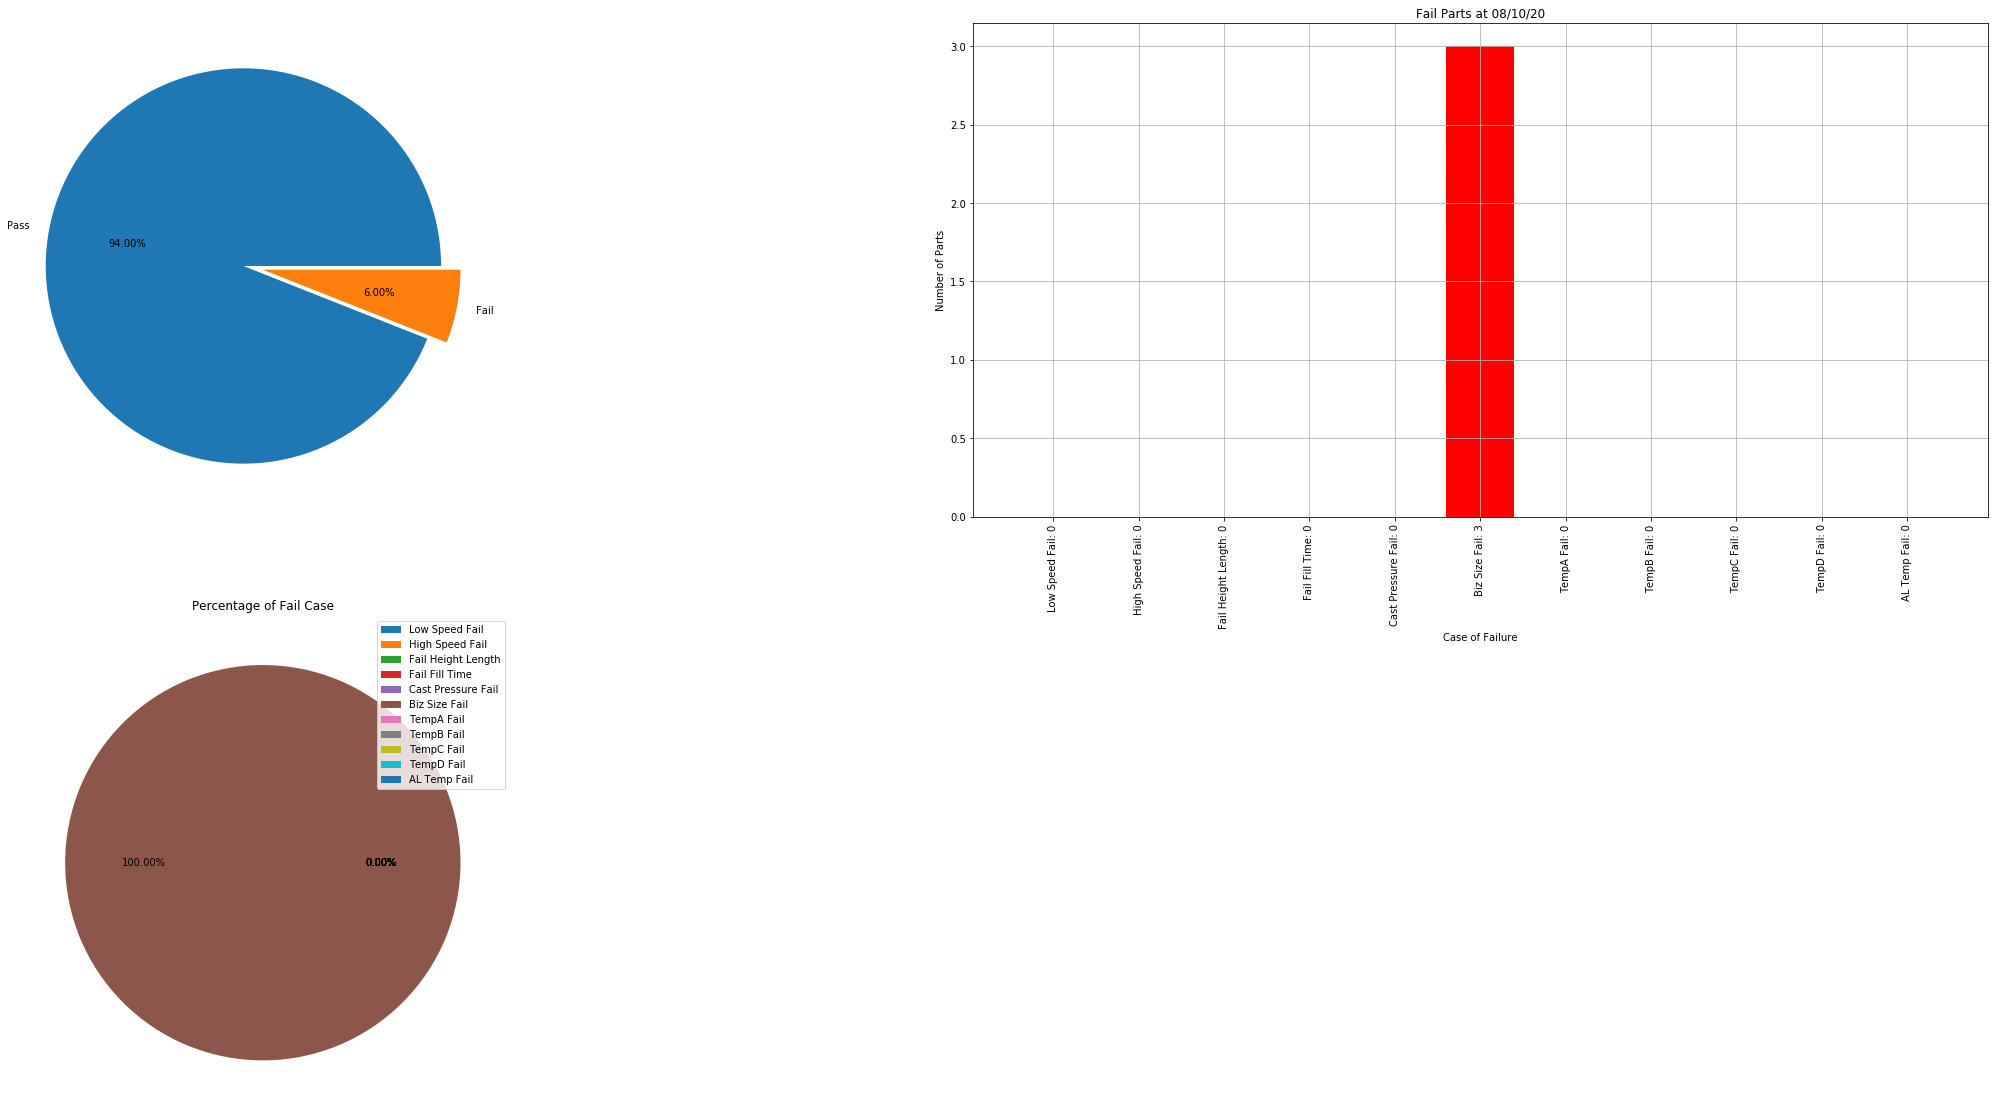

In [29]:
fig = plt.figure(figsize=(40,20))
#axis1 = fig.add_subplot(2,3,1)

status = ['Total Parts '+ "("+ str(df.shape[0])+ " parts"+ ")",'Pass '+ "("+ str(pass_count)+ " parts"+ ")",
          'Fail'+ "("+ str(fail_count)+ " parts"+ ")"]
part_numbers = [df.shape[0],pass_count,fail_count]
part_status = ['Pass', 'Fail']

#for pie chart
explode = (0.1,0)
#axis1.bar(status,part_numbers, color = 'b')
#axis1.grid(True)
#plt.title('Status at ' + date_file[1])
#plt.ylabel("Number of Parts")

axis2 = fig.add_subplot(2,2,1)

axis2.pie([pass_count,fail_count], explode=explode, labels=part_status,autopct='%1.2f%%')

fail_cases = ['Low Speed Fail: '+str(fail_lspd),'High Speed Fail: ' + str(fail_hspd),'Fail Height Length: '+str(fail_h_length),
             'Fail Fill Time: '+str(fail_fill_time),'Cast Pressure Fail: '+ str(fail_cast_pres),
             'Biz Size Fail: '+ str(fail_biz), 'TempA Fail: '+str(fail_tempa),
              'TempB Fail: '+str(fail_tempb),
              'TempC Fail: '+str(fail_tempc),'TempD Fail: '+str(fail_tempd),'AL Temp Fail: '+str(fail_altemp)]

fail_status = [fail_lspd, fail_hspd, fail_h_length, fail_fill_time,fail_cast_pres,fail_biz,
               fail_tempa,fail_tempb,fail_tempc,fail_tempd,fail_altemp]
fail_labels = ['Low Speed Fail','High Speed Fail','Fail Height Length','Fail Fill Time','Cast Pressure Fail',
              'Biz Size Fail', 'TempA Fail','TempB Fail','TempC Fail','TempD Fail','AL Temp Fail']

#fig = plt.figure(figsize=(60,20))
axis3 = fig.add_subplot(2,2,2)
axis3.bar(fail_cases,fail_status,color='r')
axis3.grid(True)
plt.title('Fail Parts at ' + date_file[1])
plt.xticks(rotation=90)
plt.xlabel("Case of Failure")
plt.ylabel('Number of Parts')

axis4 = fig.add_subplot(2,2,3)
axis4.pie(fail_status,autopct='%1.2f%%')
axis4.legend(fail_labels,loc="upper right")
plt.title('Percentage of Fail Case')

fig.savefig(excel_dir+'/'+graph_image)